<a href="https://colab.research.google.com/github/Wili6/Final-Project-DS34-BNSP/blob/main/BNSP_Final_Project_Data_Science_Wili_Williana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset source: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation/code

# **Import Libraries**

In [1]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, ShuffleSplit


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
import pickle
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BOOTCAMP DATA SCIENCE DIGITAL SKOLA/FINAL PROJECT/New Final Project/Train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BOOTCAMP DATA SCIENCE DIGITAL SKOLA/FINAL PROJECT/New Final Project/Test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

# **Evaluate Data Structure**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [5]:
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [6]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

# **Clean the Dataset**

In [8]:
df.columns.groupby(df.dtypes)

{int64: ['ID', 'Age'], float64: ['Work_Experience', 'Family_Size'], object: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']}

In [9]:
df.duplicated().sum()

38

In [10]:
df = df.drop_duplicates()

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Work_Experience,1090,10.228019
Family_Size,447,4.194426
Ever_Married,189,1.773482
Profession,162,1.520128
Var_1,108,1.013418
Graduated,100,0.938350
ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Spending_Score,0,0.000000


In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8793 non-null   int64  
 1   Gender           8793 non-null   object 
 2   Ever_Married     8793 non-null   object 
 3   Age              8793 non-null   int64  
 4   Graduated        8793 non-null   object 
 5   Profession       8793 non-null   object 
 6   Work_Experience  8793 non-null   float64
 7   Spending_Score   8793 non-null   object 
 8   Family_Size      8793 non-null   float64
 9   Var_1            8793 non-null   object 
 10  Segmentation     8793 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 824.3+ KB


## Unique values in each categorical variable:

In [14]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [15]:
df['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

# **Check Target Variable Distribution**

In [16]:
df['Segmentation'].value_counts()

D    2378
A    2304
C    2095
B    2016
Name: Segmentation, dtype: int64

Distribusi data untuk setiap segmen hampir sama sehingga tidak perlu dilakukan balancing data.

# **Exploratory Data Analysis**

In [17]:
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

In [18]:
def add_proportion_labels(ax, font_size=10):
    for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      if height > 5:
        ax.text(x+width/2,
                y+height/2,
                '{:.1f}%'.format(height),
                horizontalalignment='center',
                verticalalignment='center',
                fontdict={'size':font_size})

## Distribution Analysis

### Numerical Feature Distribution

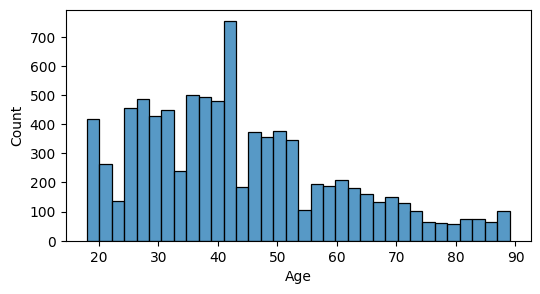

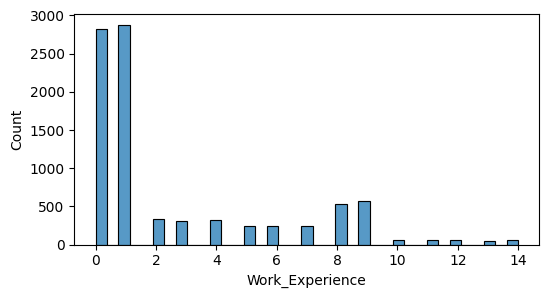

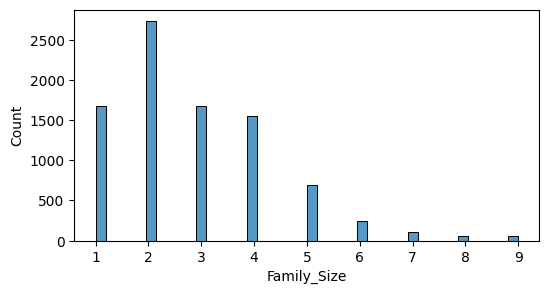

In [19]:
num_col = ('Age', 'Work_Experience', 'Family_Size')
for numerical in num_col:
  plt.figure(figsize=(6,3))
  sns.histplot(data=df, x=numerical)
  # plt.savefig(numerical+'.png')

### Categorical Feature Distribution

In [20]:
 df.select_dtypes(include=['object']).columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

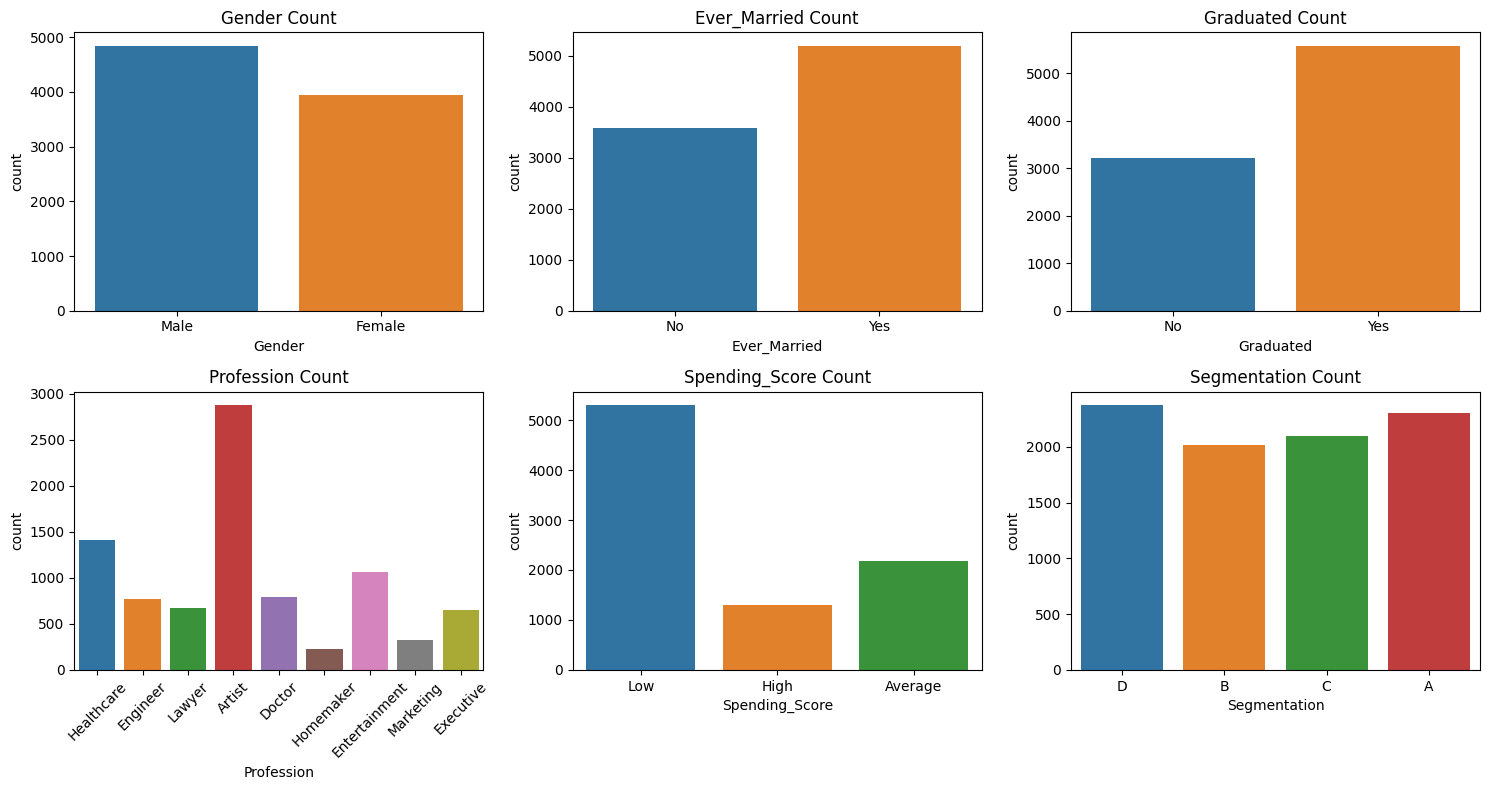

In [21]:
cat_col = df.select_dtypes(include=['object']).drop(columns=['Var_1']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 3, i)
    if col == 'Profession':
        sns.countplot(data=df, x=col, hue=col)
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col, hue=col)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

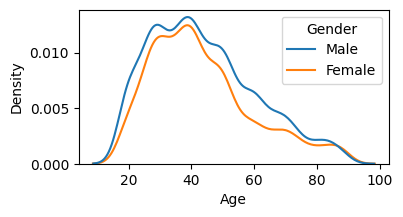

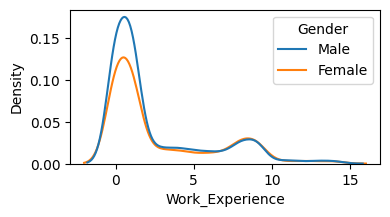

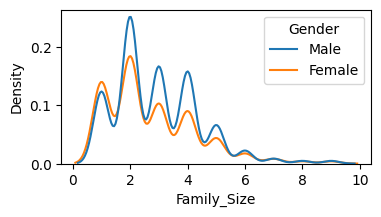

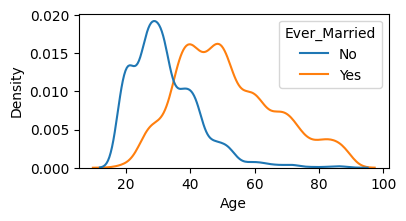

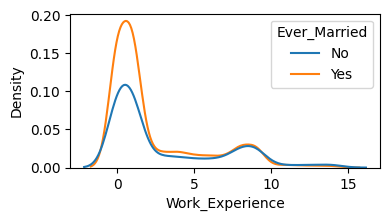

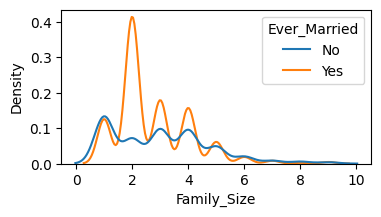

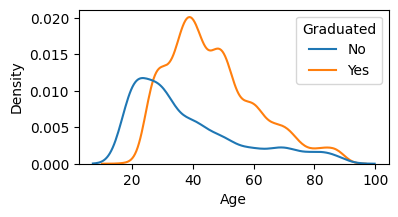

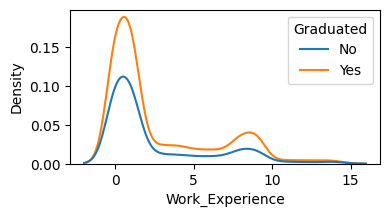

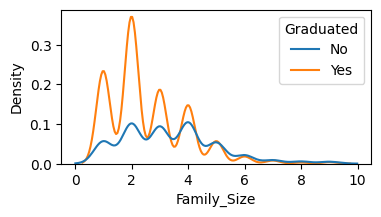

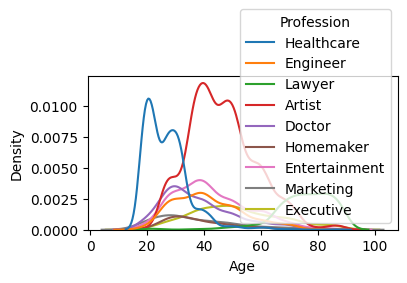

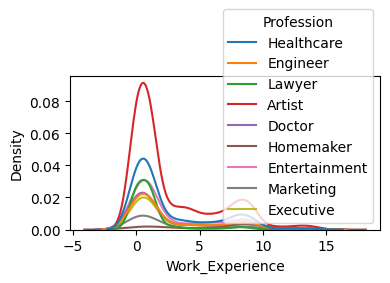

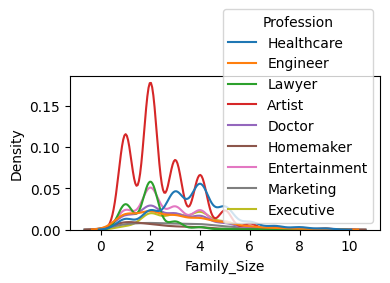

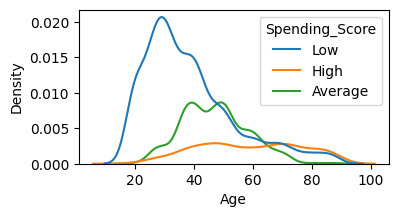

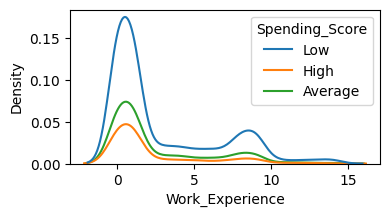

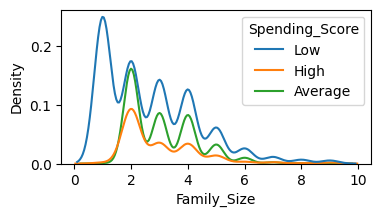

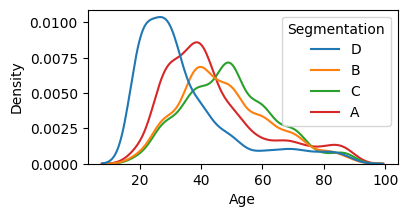

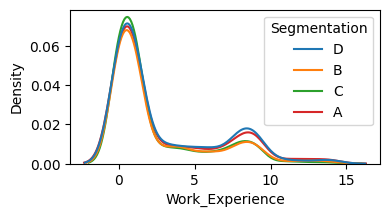

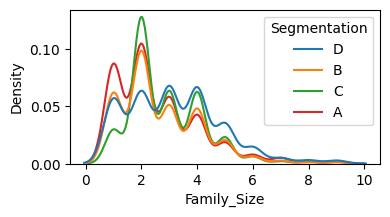

In [22]:
for category in cat_col:
  for numerical in num_col:
    if numerical != 'ID':
      plt.figure(figsize=(4,2))
      sns.kdeplot(data=df, x=numerical, hue=category) # switch to histplot for non-normalized version

## **Profiling Customer Segmentation**

### Segmentation by Profession Type

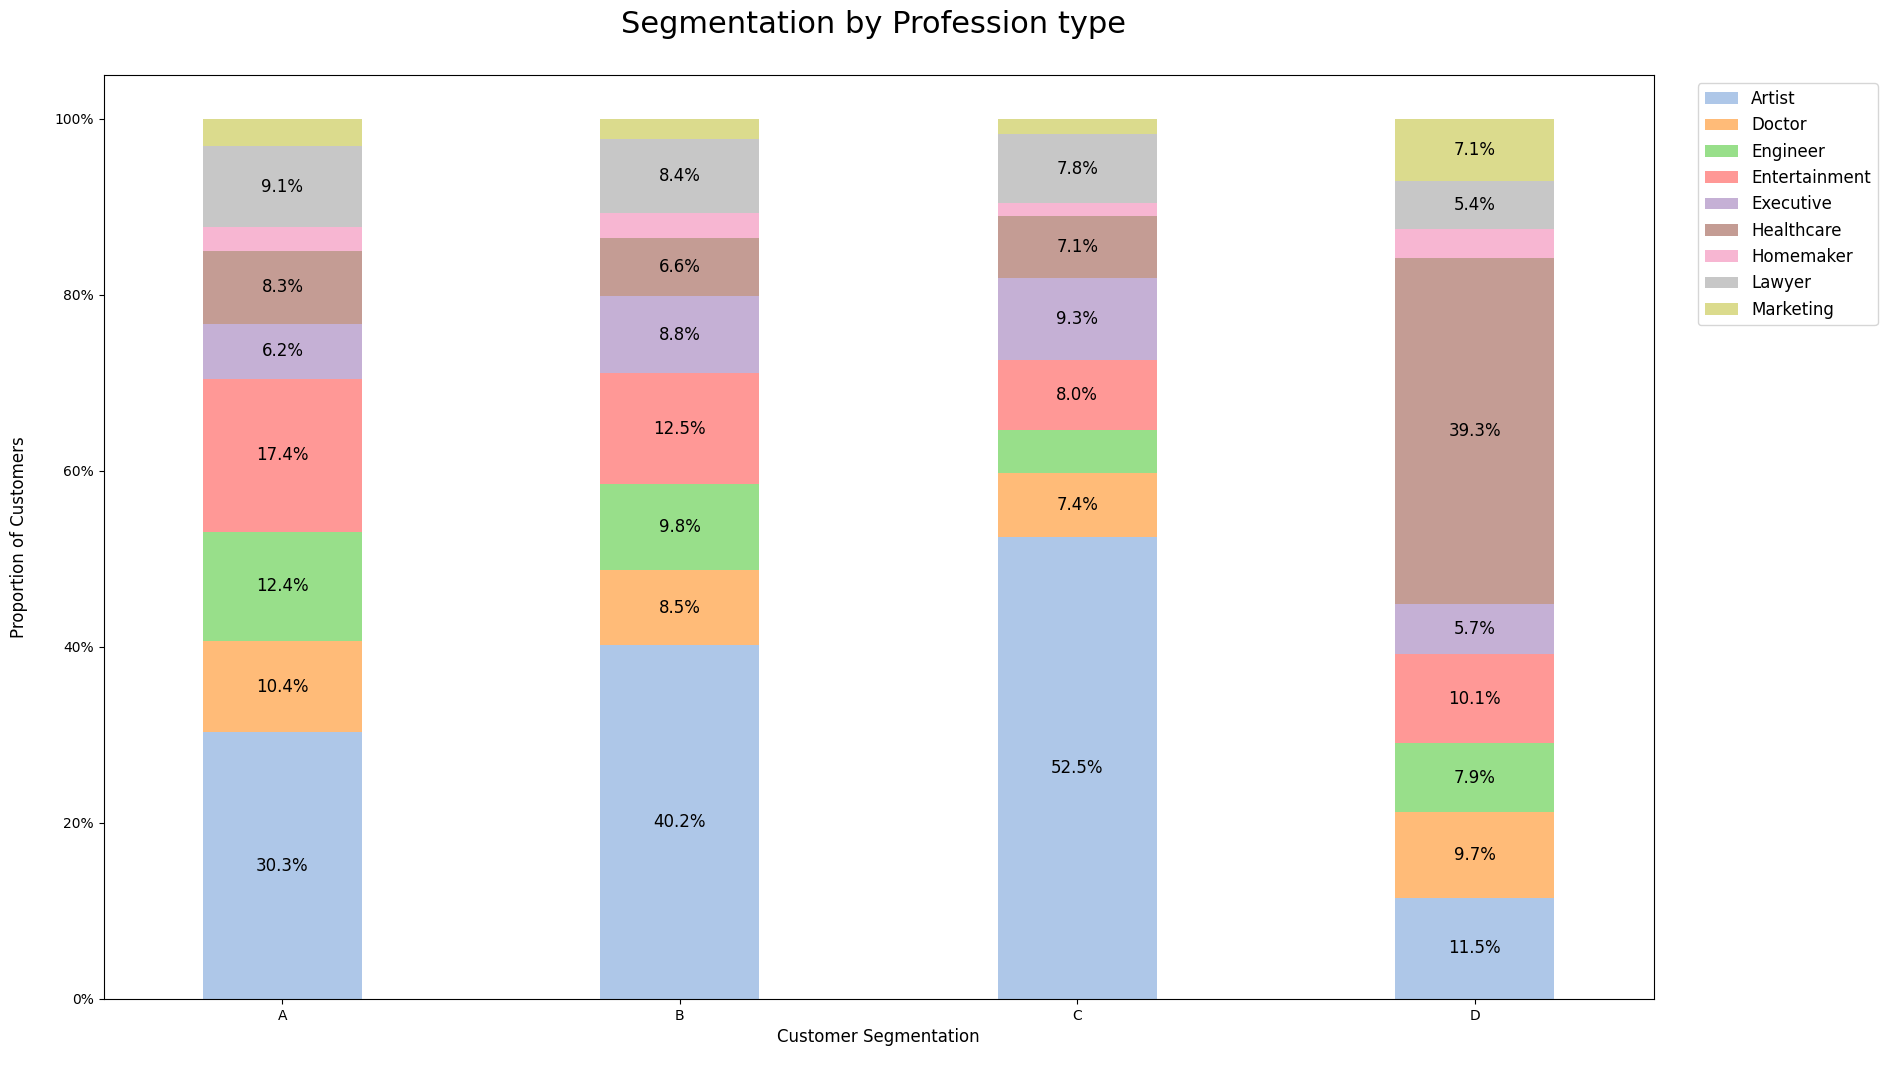

In [23]:
import matplotlib.ticker as mtick

profession_segmentation = df.groupby(['Segmentation', 'Profession']).size().unstack()

colors = [
    '#aec7e8',  # Biru muda
    '#ffbb78',  # Jingga muda
    '#98df8a',  # Hijau muda
    '#ff9896',  # Merah muda
    '#c5b0d5',  # Ungu muda
    '#c49c94',  # Cokelat muda
    '#f7b6d2',  # Magenta muda
    '#c7c7c7',  # Abu-abu muda
    '#dbdb8d'   # Kuning muda
]

ax = (profession_segmentation.T*100.0 / profession_segmentation.T.sum()).T.plot(kind='bar',
                                                                width = 0.4,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (20,12),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Customer Segmentation\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Segmentation by Profession type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "large", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

add_proportion_labels(ax, 12)

ax.autoscale(enable=False, axis='both', tight=False)

### Segmentation by Spending Score Type

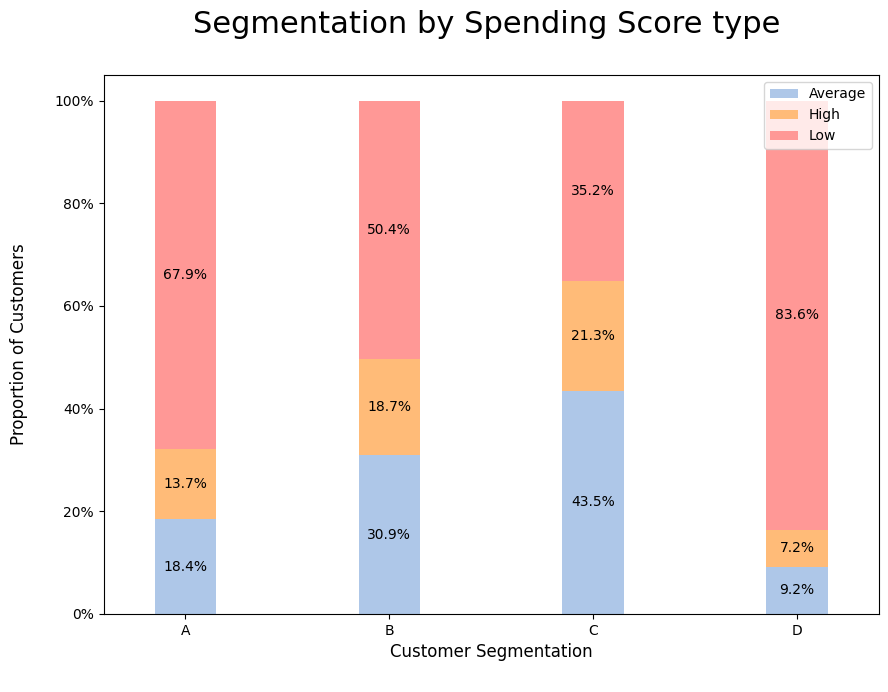

In [24]:

spending_score_segmentation = df.groupby(['Segmentation', 'Spending_Score']).size().unstack()

spending_score_segmentation.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors = ['#aec7e8', '#ffbb78', '#ff9896']  # Light blue, Light orange, Light green, Light red

ax = (spending_score_segmentation.T*100.0 / spending_score_segmentation.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Customer Segmentation\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Segmentation by Spending Score type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

add_proportion_labels(ax)

ax.autoscale(enable=False, axis='both', tight=False)

### Segmentation by Family Size

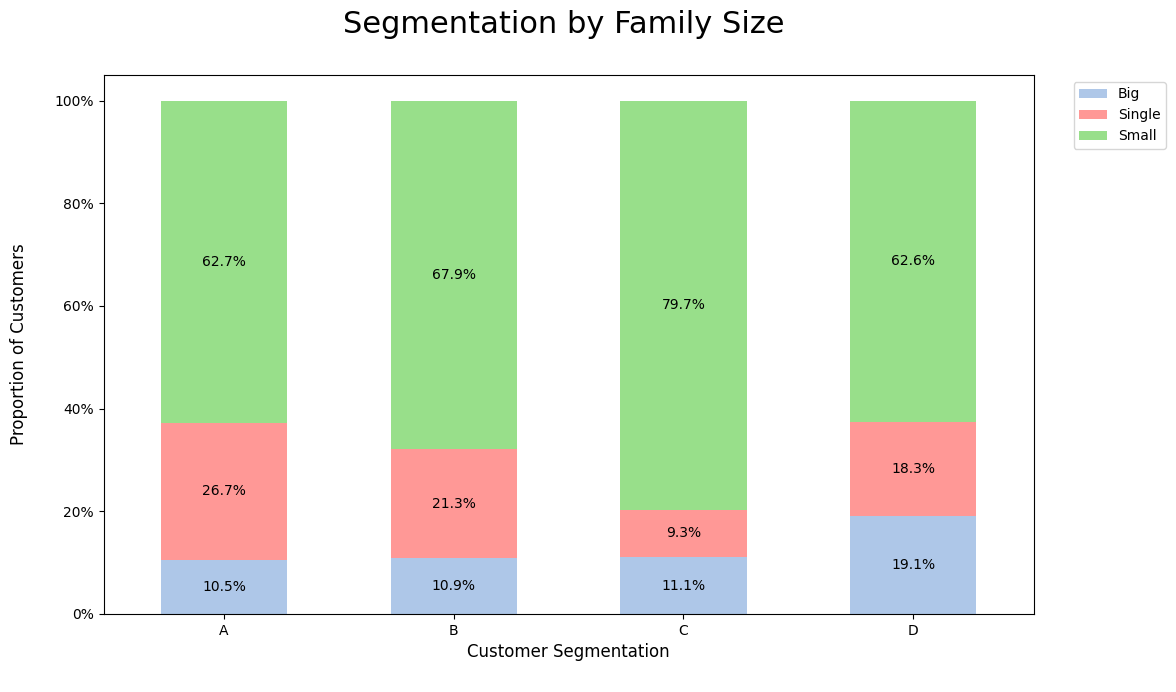

In [25]:
family_size = df['Family_Size'].apply(lambda x: 'Single' if x <= 1 else 'Small' if x < 5 else 'Big')
family_size_segmentation = df.groupby([df['Segmentation'], family_size]).size().unstack()

# family_size_segmentation.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors = [
    '#aec7e8',  # Biru muda
    '#ff9896',  # Merah muda
    '#98df8a',  # Hijau muda
    '#ffbb78',  # Jingga muda
    '#ff9896',  # Merah muda (berbeda dari sebelumnya)
    '#c49c94',  # Cokelat muda
    '#f7b6d2',  # Magenta muda
    '#c7c7c7',  # Abu-abu muda
    '#dbdb8d'   # Kuning muda
]

ax = (family_size_segmentation.T*100.0 / family_size_segmentation.T.sum()).T.plot(kind='bar',
                                                                width = 0.55 ,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Customer Segmentation\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Segmentation by Family Size \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

add_proportion_labels(ax)

ax.autoscale(enable=False, axis='both', tight=False)

Untuk yang family size mau pake yang ini apa yang bawah terserah

### Segmentation by Gender/Ever_Married/Graduated

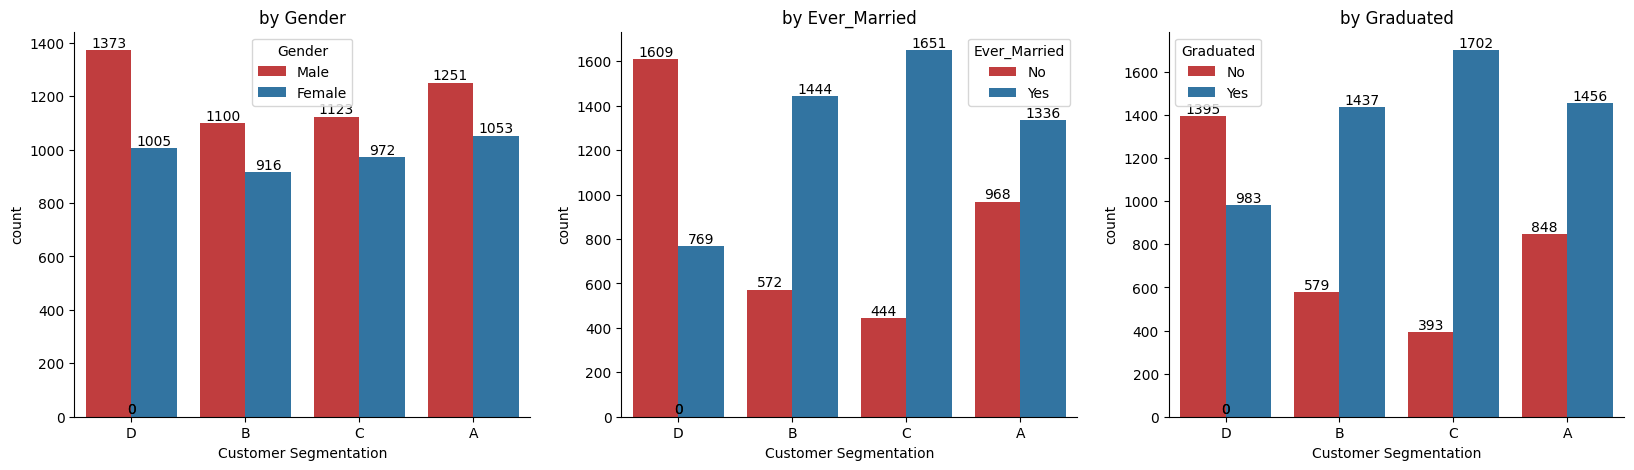

In [26]:
# Membuat subplots
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

# Palet warna
colors = ['#d62728', '#1f77b4']

# Plotting setiap countplot
sns.countplot(data=df, x='Segmentation', hue='Gender', palette=colors, ax=ax[0])
sns.countplot(data=df, x='Segmentation', hue='Ever_Married', palette=colors, ax=ax[1])
sns.countplot(data=df, x='Segmentation', hue='Graduated', palette=colors, ax=ax[2])

hue_columns = ['Gender', 'Ever_Married', 'Graduated']

# Menambahkan nilai teks di atas setiap bar
i = 0
for axes in ax:
    for p in axes.patches:
        axes.annotate(f'{"{:.0f}".format(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')
    axes.set_xlabel('Customer Segmentation')
    axes.set_xticklabels(df['Segmentation'].unique())  # Mengatur urutan indeks pada sumbu x
    axes.set_title(f'by {hue_columns[i]}')  # Menambahkan judul
    i += 1

# Menghilangkan spines yang tidak perlu
for axis in ax:
    axis.spines[['top', 'right']].set_visible(False)

plt.show()



### Segmentation by Age

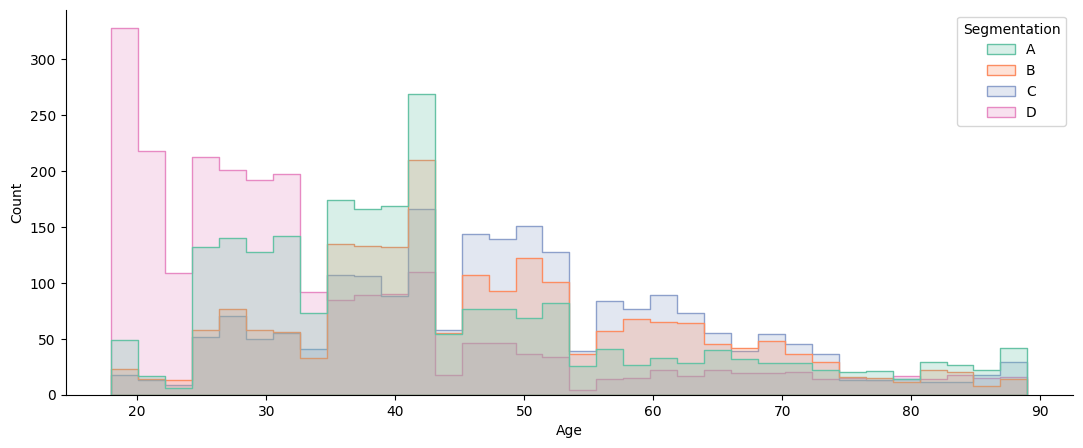

In [27]:
fig, ax = plt.subplots(figsize=(13, 5))

segmentasi = np.sort(df['Segmentation'].unique())
sns.histplot(df, x="Age", hue="Segmentation", hue_order=segmentasi, element="step", palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

# **Data Preprocessing**

In [28]:
df_cp = df.copy()

In [29]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8793 non-null   int64  
 1   Gender           8793 non-null   object 
 2   Ever_Married     8793 non-null   object 
 3   Age              8793 non-null   int64  
 4   Graduated        8793 non-null   object 
 5   Profession       8793 non-null   object 
 6   Work_Experience  8793 non-null   float64
 7   Spending_Score   8793 non-null   object 
 8   Family_Size      8793 non-null   float64
 9   Var_1            8793 non-null   object 
 10  Segmentation     8793 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 824.3+ KB


## Feature Tranformation

*   *H*0: distribusi normal
*   *H*1: distribusi tidak normal

In [30]:
from scipy import stats

for col in num_col:
  normaltest_result = stats.normaltest(df_cp[col])[1]
  print(f'The p-value for the null hypothesis of the {col} being Normally distributed is {normaltest_result}')


The p-value for the null hypothesis of the Age being Normally distributed is 2.1942429066309096e-128
The p-value for the null hypothesis of the Work_Experience being Normally distributed is 0.0
The p-value for the null hypothesis of the Family_Size being Normally distributed is 1.1833518612461775e-290


untuk ketiga kolom numerik di atas memilki nilai p-value di bawah 0.05 sehingga H0 ditolak dan ketiga kolom tidak terdistribusi normal

In [31]:
from sklearn.preprocessing import PowerTransformer

def apply_log(column):
    return np.log(column+1)

def normality_test(column):
    return stats.normaltest(column)

In [32]:
def trans_result(data, column):
  # PowerTransform data
  feature = data[column].to_numpy().reshape(-1,1)

  powtr = PowerTransformer()
  feature_transf = powtr.fit_transform(feature)
  array_1d = feature_transf.flatten()
  feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

  # Log Transform data
  log_transformed = apply_log(data[column])

  # Create axis for original data plot (ax1) and transformed data (ax2)
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

  # Plot original data & get metrics
  data[column].plot(kind='hist', ax=ax1)
  ax1.title.set_text('Original data')
  norm_test1 = normality_test(data[column])

  # Plot log transformed data & get metrics
  log_transformed.plot(kind='hist', ax=ax2);
  ax2.title.set_text('Log Transformed data')
  norm_test2 = normality_test(log_transformed)

  # Plot power transformed data & get metrics
  feature.plot(kind='hist', ax=ax3);
  ax3.title.set_text('PowerTransformed data')
  norm_test3 = normality_test(feature)

  # Create a DataFrame that shows normality test results for each tranformation
  norm_results = [norm_test1, norm_test2, norm_test3]
  metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])
  return log_transformed, metrics

### Feature: Age

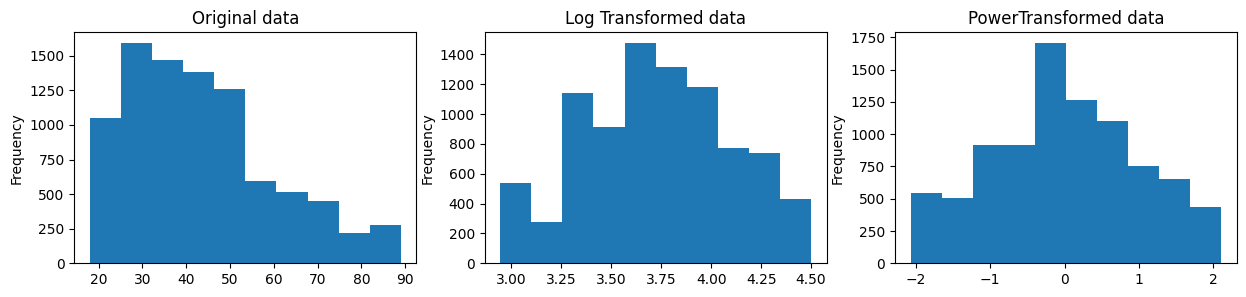

In [33]:
df_cp['Age'], _ = trans_result(df_cp, 'Age')

## Label Encode Binary data

In [34]:
columns = ('Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Var_1', 'Segmentation')
le_count = 1

encoders = {} # buat nyimpen objek encoder untuk kolom-kolom yg di-encode
for col in columns:
  lbl = LabelEncoder()
  lbl.fit(df_cp[col])
  df_cp[col] = lbl.transform(df_cp[col])
  encoders[col] = lbl # encoder untuk tiap kolom kita simpan untuk deployment nanti
  le_count += 1
print('{} columns were label encoded.'.format(le_count))

7 columns were label encoded.


## Encode Categorical Data

In [35]:
# convert rest of categorical variable into dummy

df_cp = pd.get_dummies(df_cp, drop_first=True) # One-Hot Encoding

In [36]:
df_cp

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,1,0,3.135494,0,1.0,2,4.0,3,3,0,0,0,0,1,0,0,0
2,466315,0,1,4.219508,1,1.0,2,1.0,5,1,0,1,0,0,0,0,0,0
3,461735,1,1,4.219508,1,0.0,1,2.0,5,1,0,0,0,0,0,0,1,0
5,461319,1,1,4.043051,0,0.0,0,2.0,5,2,0,0,0,0,0,0,0,0
6,460156,1,0,3.496508,1,1.0,2,3.0,5,2,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,467950,0,0,3.583519,1,1.0,2,2.0,5,3,0,0,1,0,0,0,0,0
10690,467954,1,0,3.401197,0,9.0,2,4.0,5,1,0,0,0,0,1,0,0,0
10691,467958,0,0,3.583519,1,1.0,2,1.0,5,0,1,0,0,0,0,0,0,0
10693,467961,1,1,3.871201,1,1.0,1,5.0,3,2,0,0,0,1,0,0,0,0


In [37]:
one_hot_columns = df_cp.columns #kita simpan kolom2 hasil encoding untuk digunakan nanti
one_hot_columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

# **Feature Scaling**

In [38]:
df_tmp = df_cp.copy()

In [39]:
y = df_tmp['Segmentation'].values
X = df_tmp.drop(['Segmentation', 'ID', 'Var_1'], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
sc_X = RobustScaler()
X = sc_X.fit_transform(X)
pickle.dump(sc_X.fit(X), open(f'scaler.pkl', 'wb'))


# Split Data Train and Data Test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train, X_test, y_train, y_test

(array([[-1.        ,  0.        ,  0.97625884, ...,  0.        ,
          0.        ,  0.        ],
        [-1.        , -1.        ,  0.40816982, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -1.        , -0.91653088, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.61686486, ...,  0.        ,
          0.        ,  0.        ],
        [-1.        , -1.        , -0.84440386, ...,  1.        ,
          0.        ,  0.        ],
        [-1.        ,  0.        , -0.04605377, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.25519707, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -1.        , -1.51597411, ...,  0.        ,
          0.        ,  0.        ],
        [-1.        ,  0.        , -0.58037934, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        , -1.        , -1.3247007 , ...,  

# **Machine Learning Model**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

## Model Evaluation

In [44]:
# Make prediction using 5 machine learning models
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'rbf', random_state = 3)
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
xgc = XGBClassifier()
models_1 = [lr,dt,rf,svm, knn, nb, xgc]

In [45]:
# fungsi untuk melakukan cross validation
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = 'accuracy')
    score = r2_val_score.mean()
    return score

In [46]:
col = ['Algorithm',  'Accuracy']
model_results = pd.DataFrame(columns=col)

models_name = ['Logistic Regression', 'Desicion Tree', 'Random Forest', 'Support Vector Machine',
               'K-Nearest Neighboor', 'GaussianNB', 'XGBoost CLassifier']

i = 0
for model in models_1:
  models_pred = test_model(model)
  model_results.loc[i] = [models_name[i], round(models_pred * 100, 2)]
  i += 1

model_results

,Algorithm,Accuracy
0,Logistic Regression,46.77
1,Desicion Tree,37.02
2,Random Forest,40.16
3,Support Vector Machine,47.41
4,K-Nearest Neighboor,40.75
5,GaussianNB,44.27
6,XGBoost CLassifier,44.67


In [47]:
def evaluate_model(predictions,name):
    print('Model: ',name)
    print(classification_report(y_test,predictions))
    cm = confusion_matrix(y_test,predictions)
    disp   = ConfusionMatrixDisplay(cm)
    disp.plot()
    na = 'Conf'
    plt.title('Confusion Matrix for '+ name)

In [48]:
preds = [[], [], [], [], [], [], []]

for i,model in enumerate(models_1):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds

[array([0, 3, 0, ..., 3, 3, 2]),
 array([2, 3, 3, ..., 3, 3, 2]),
 array([2, 3, 3, ..., 3, 3, 2]),
 array([0, 3, 0, ..., 3, 3, 2]),
 array([0, 3, 0, ..., 3, 3, 2]),
 array([0, 3, 0, ..., 3, 0, 2]),
 array([0, 3, 0, ..., 3, 3, 2])]

## Model Training and Prediction

Model:  LogisticRegression
              precision    recall  f1-score   support

           0       0.43      0.52      0.47       483
           1       0.35      0.15      0.21       398
           2       0.45      0.58      0.51       400
           3       0.59      0.61      0.60       478

    accuracy                           0.47      1759
   macro avg       0.46      0.46      0.45      1759
weighted avg       0.46      0.47      0.46      1759

Model:  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.39      0.37      0.38       483
           1       0.29      0.29      0.29       398
           2       0.41      0.46      0.43       400
           3       0.51      0.49      0.50       478

    accuracy                           0.40      1759
   macro avg       0.40      0.40      0.40      1759
weighted avg       0.40      0.40      0.40      1759

Model:  RandomForestClassifier
              precision    recall  f1-sco

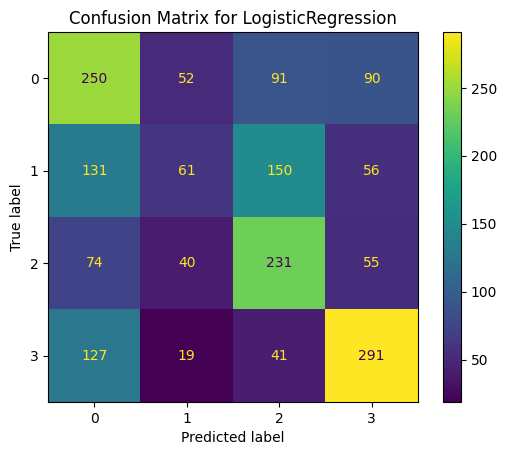

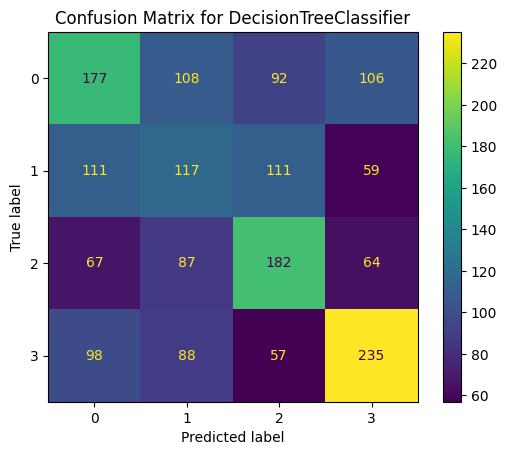

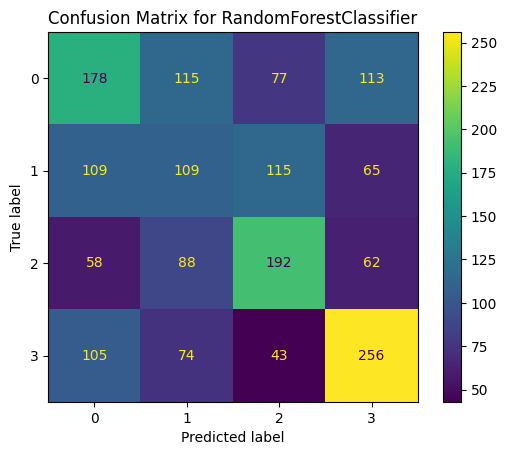

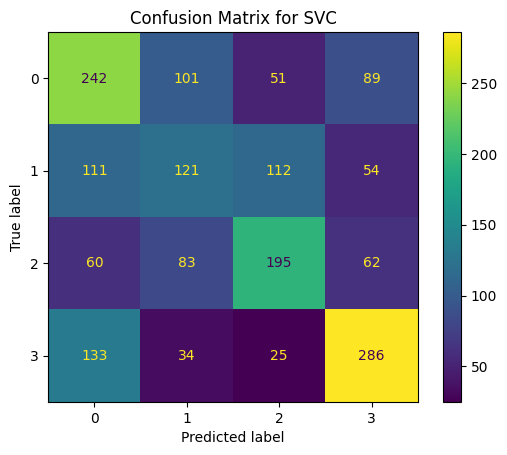

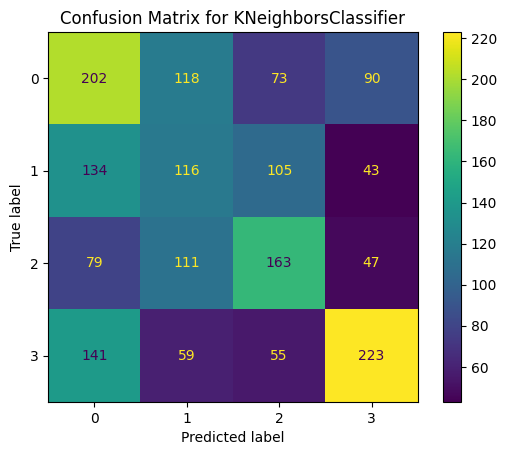

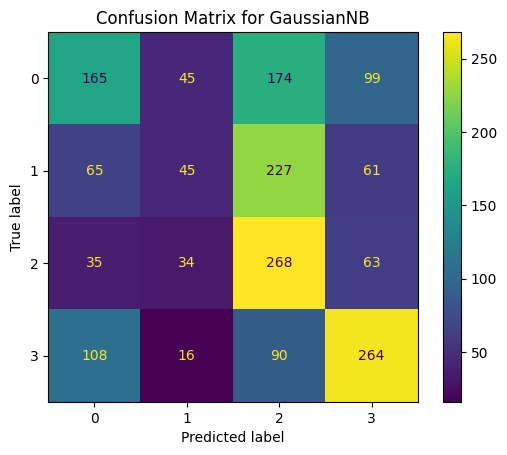

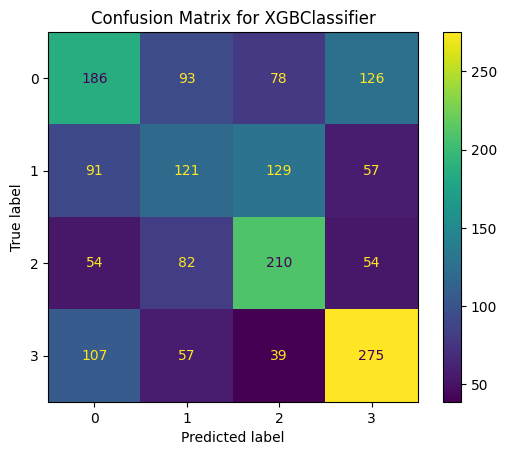

In [49]:
for i in range(len(preds)):
  evaluate_model(predictions = preds[i], name = str(models_1[i]).split('(')[0])

In [50]:
svm = SVC(probability=True)
best_model = svm.fit(X_train, y_train)
pickle.dump(best_model, open(f'model_svm.pkl', 'wb'))